In [ ]:
# #!/usr/bin/env python

# # make sure to install these packages before running:
# # pip install pandas
# # pip install sodapy

# import pandas as pd
# from sodapy import Socrata

# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# # client = Socrata("data.wa.gov", None)

# # Example authenticated client (needed for non-public datasets):
# client = Socrata("data.wa.gov",
#                  "9Wd0idzQuFB6INKzZXZH63zT2",
#                  username="dzjfrank@gmail.com",
#                  password="Qwer1234")

# # First 2000 results, returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# results = client.get("brw6-jymh", limit=2000, where = "model_year > 2020", select = "start_of_month, make, model, model_year, county")

# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)

Overall Electric Vehicle Trends: Analyze the number of electric vehicles sold over the years in the dataset.

Tesla's Market Position: Examine Tesla's share among electric vehicles, including trends in sales over time.

Comparison with Other Electric Vehicle Makes: Compare Tesla with other electric vehicle manufacturers in terms of sales and market share.

Tesla Model Trends: Break down Tesla's sales by model to understand the most popular models.

Geographical Distribution: Look at the geographical distribution of electric vehicle and Tesla sales.


<!-- import os
import requests

current_file_path = os.path.abspath(__file__)
project_root = os.path.dirname(os.path.dirname(current_file_path))

data_raw_folder = os.path.join(project_root, 'data', 'raw')

# create data/raw/ folder
if not os.path.exists(data_raw_folder):
    os.makedirs(data_raw_folder)

# download data
data_file_path = os.path.join(data_raw_folder, 'vehicleData.csv')

url = r'https://data.wa.gov/api/views/brw6-jymh/rows.csv?accessType=DOWNLOAD'
r = requests.get(url)
with open(data_file_path, 'wb') as f:
    f.write(r.content)

print('Data downloaded and saved to {}'.format(data_file_path)) -->


In [1]:
import pandas as pd


In [50]:
# chunk_size = 2000000
# cols_to_use = ['Make', 'Model', "Model Year",]
# chunks = pd.read_csv('../data/raw/vehicleData.csv', usecols=cols_to_use, chunksize=chunk_size)


In [78]:
# df = pd.read_csv('../data/raw/vehicleData.csv',)

/var/folders/08/h1s377jj0hs79v0t6mc5wfgc0000gn/T/ipykernel_91756/3364217106.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/vehicleData.csv',)


# Only focous on data 2020 to 2023

In [80]:
# df["Transaction Year"] = df["Transaction Month and Year"].str[-4:].astype(int)

In [81]:
# df2 = df[df["Transaction Year"] > 2018]

In [82]:
# df3 = df2[df2["Transaction Year"] < 2024]

In [91]:
# df4 = df3[df3["Transaction Type"] == "Original Registration"]

In [98]:
df4.to_csv('../data/raw/vehicleData2019_2023_reg.csv', index=False)

In [93]:
# data = df4

In [99]:
data = pd.read_csv('../data/raw/vehicleData2019_2023_reg.csv')

/var/folders/08/h1s377jj0hs79v0t6mc5wfgc0000gn/T/ipykernel_91756/921533195.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/vehicleData2019_2023_reg.csv')


In [111]:
# Filter the dataset for electric vehicles
electric_vehicles = data[data['Fuel Type Primary'].str.lower() == 'electric']

# Count the number of electric vehicles sold per year
ev_sales_by_year = electric_vehicles['Transaction Month and Year'].str[-4:].value_counts().sort_index()

ev_sales_by_year


Transaction Month and Year
2020    14670
2021    24823
2022    33716
2023    54522
Name: count, dtype: int64

In [113]:
# Filter the dataset for Tesla vehicles
tesla_vehicles = electric_vehicles[electric_vehicles['Make'].str.upper() == 'TESLA']

# Count the number of Tesla vehicles sold per year
tesla_sales_by_year = tesla_vehicles['Transaction Month and Year'].str[-4:].value_counts().sort_index()

# Calculate Tesla's market share among electric vehicles by year
tesla_market_share_by_year = (tesla_sales_by_year / ev_sales_by_year) * 100

tesla_sales_by_year, tesla_market_share_by_year


(Transaction Month and Year
 2020     8148
 2021    12864
 2022    16661
 2023    24597
 Name: count, dtype: int64,
 Transaction Month and Year
 2020    55.541922
 2021    51.822906
 2022    49.415708
 2023    45.113899
 Name: count, dtype: float64)

In [114]:
# Get sales by make for all electric vehicles
ev_sales_by_make = electric_vehicles.groupby('Make')['Transaction Month and Year'].count().sort_values(ascending=False)

# Calculate market share for each make
total_ev_sales = electric_vehicles['Transaction Month and Year'].count()
ev_market_share_by_make = (ev_sales_by_make / total_ev_sales) * 100

ev_sales_by_make.head(10), ev_market_share_by_make.head(10)


(Make
 TESLA         62270
 CHEVROLET      7431
 KIA            5689
 NISSAN         5598
 BMW            5572
 FORD           5431
 VOLKSWAGEN     4247
 HYUNDAI        4000
 TOYOTA         3766
 VOLVO          3714
 Name: Transaction Month and Year, dtype: int64,
 Make
 TESLA         48.750891
 CHEVROLET      5.817695
 KIA            4.453891
 NISSAN         4.382648
 BMW            4.362293
 FORD           4.251904
 VOLKSWAGEN     3.324956
 HYUNDAI        3.131581
 TOYOTA         2.948384
 VOLVO          2.907673
 Name: Transaction Month and Year, dtype: float64)

In [115]:
# Analyze Tesla's sales by model
tesla_sales_by_model = tesla_vehicles.groupby('Model')['Transaction Month and Year'].count().sort_values(ascending=False)

tesla_sales_by_model


Model
MODEL Y     32165
MODEL 3     22131
MODEL X      4043
MODEL S      3920
ROADSTER       11
Name: Transaction Month and Year, dtype: int64

In [117]:
# Analyze the geographical distribution of electric vehicle sales, focusing on Tesla
ev_sales_by_county = electric_vehicles.groupby('County')['Transaction Month and Year'].count().sort_values(ascending=False)
tesla_sales_by_county = tesla_vehicles.groupby('County')['Transaction Month and Year'].count().sort_values(ascending=False)

ev_sales_by_county.head(5), tesla_sales_by_county.head(5)


(County
 King         65588
 Snohomish    15171
 Pierce       10284
 Clark         8813
 Kitsap        4079
 Name: Transaction Month and Year, dtype: int64,
 County
 King         34706
 Snohomish     8317
 Pierce        4811
 Clark         3735
 Thurston      1530
 Name: Transaction Month and Year, dtype: int64)

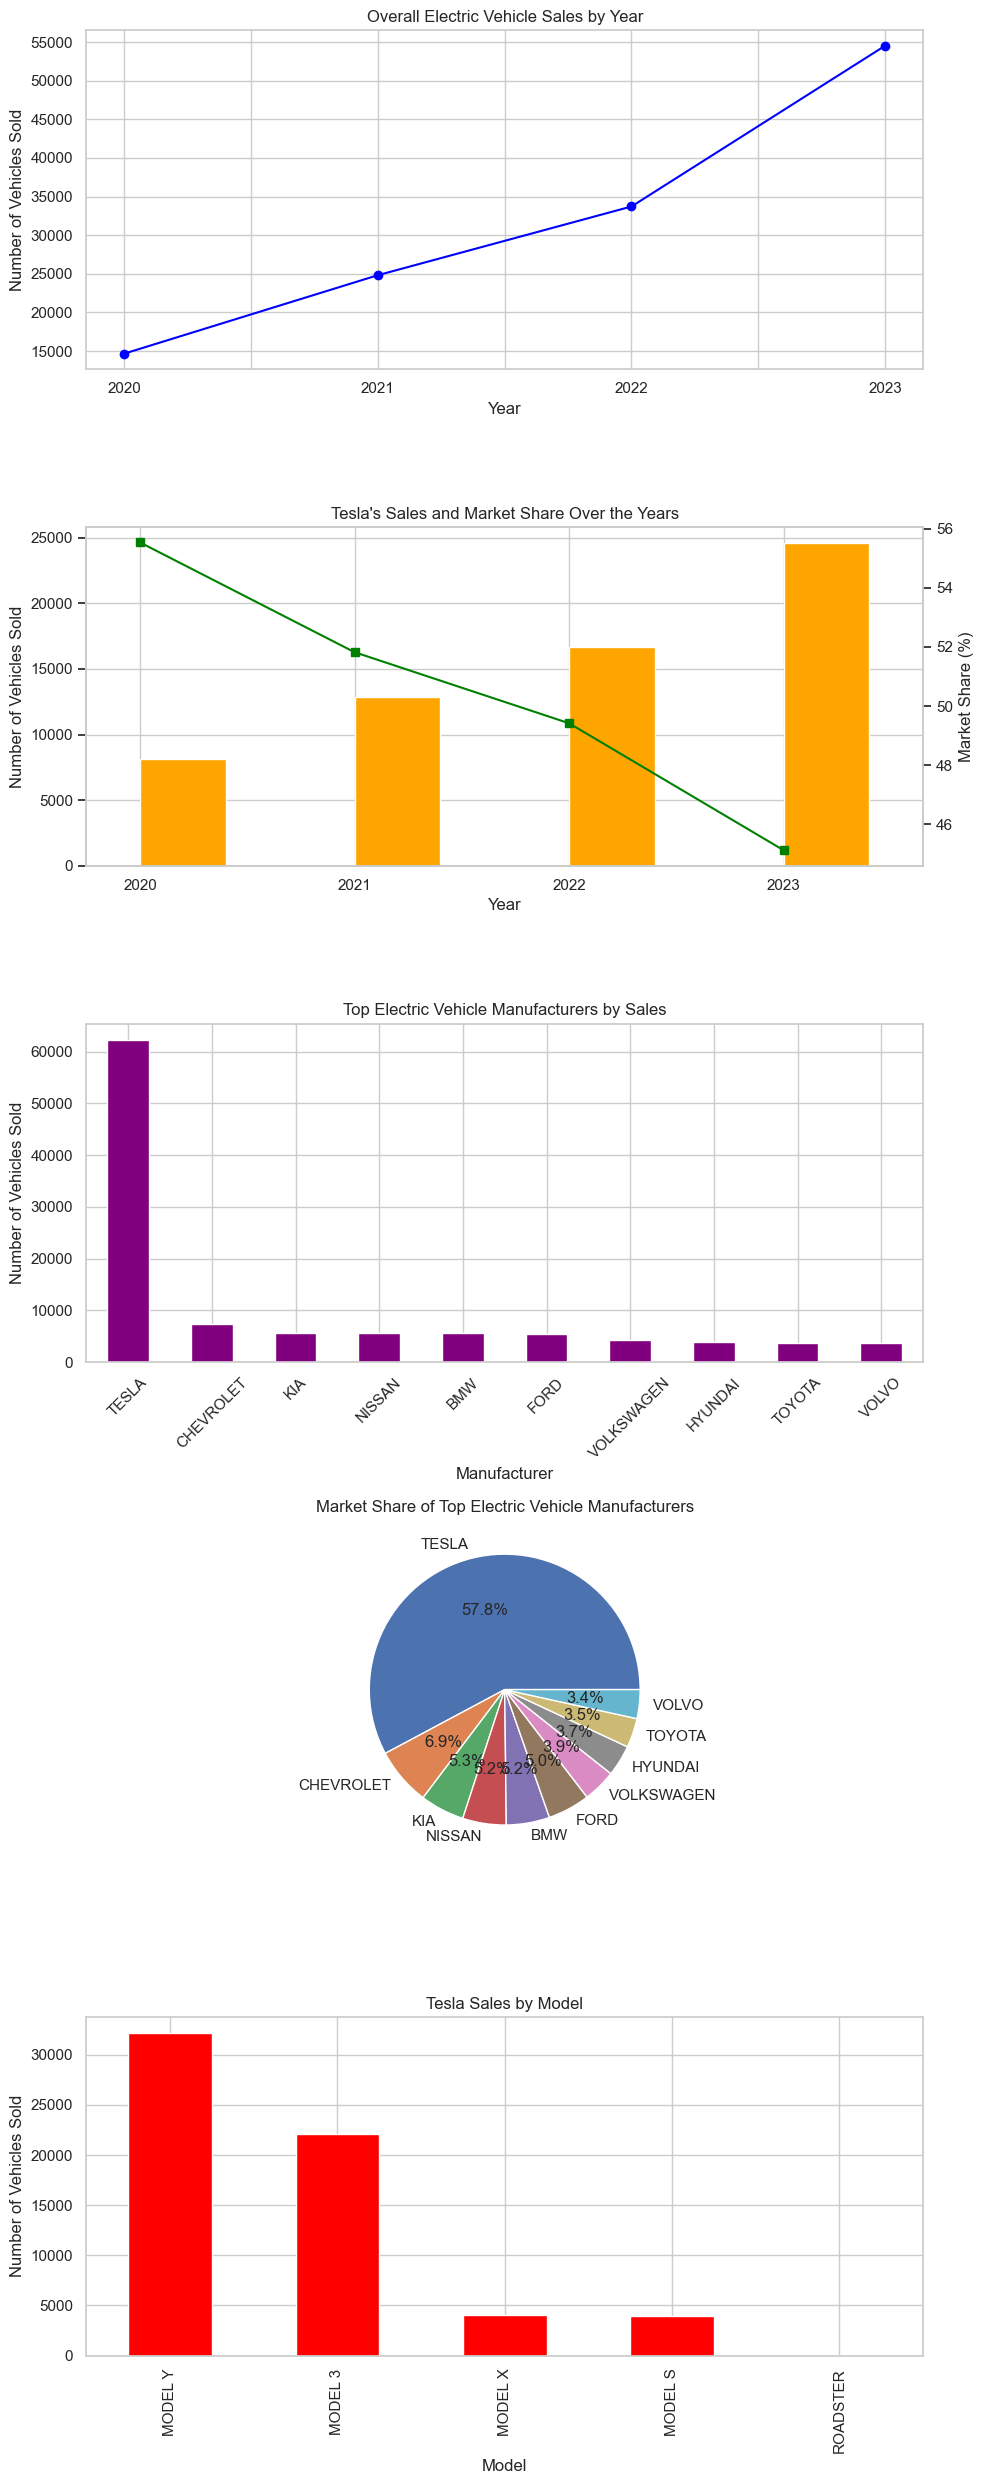

In [118]:
import matplotlib.pyplot as plt

# Setting up the plotting area
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Overall Electric Vehicle Trends
ev_sales_by_year.plot(ax=ax[0], marker='o', linestyle='-', color='blue')
ax[0].set_title('Overall Electric Vehicle Sales by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Vehicles Sold')
ax[0].grid(True)

# Tesla's Market Position (Sales and Market Share)
tesla_sales_by_year.plot(ax=ax[1], kind='bar', color='orange', position=0, width=0.4, label='Sales')
tesla_market_share_by_year.plot(ax=ax[1], secondary_y=True, marker='s', linestyle='-', color='green', label='Market Share')
ax[1].set_title("Tesla's Sales and Market Share Over the Years")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Vehicles Sold')
ax[1].right_ax.set_ylabel('Market Share (%)')
ax[1].grid(True)

# Comparison with Other Electric Vehicle Makes (Sales)
ev_sales_by_make.head(10).plot(ax=ax[2], kind='bar', color='purple')
ax[2].set_title('Top Electric Vehicle Manufacturers by Sales')
ax[2].set_xlabel('Manufacturer')
ax[2].set_ylabel('Number of Vehicles Sold')
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(True)

# Comparison with Other Electric Vehicle Makes (Market Share)
ev_market_share_by_make.head(10).plot(ax=ax[3], kind='pie', autopct='%1.1f%%')
ax[3].set_title('Market Share of Top Electric Vehicle Manufacturers')
ax[3].set_ylabel('')

# Tesla Model Trends
tesla_sales_by_model.plot(ax=ax[4], kind='bar', color='red')
ax[4].set_title('Tesla Sales by Model')
ax[4].set_xlabel('Model')
ax[4].set_ylabel('Number of Vehicles Sold')
ax[4].grid(True)

plt.tight_layout()
plt.show()


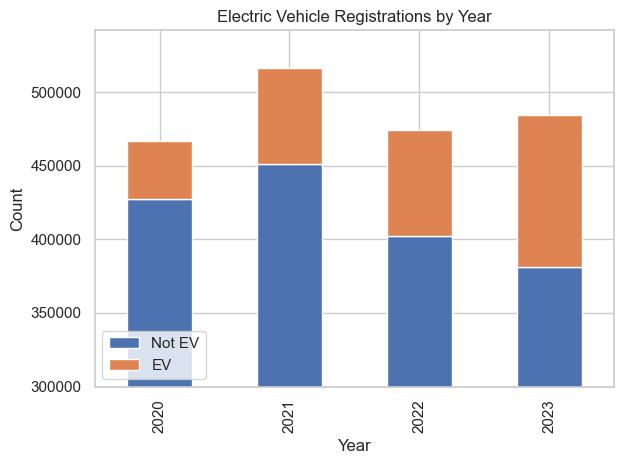

In [150]:
# Assuming the column "Electrification Level" exists and it indicates the electric vehicle status,
# and also assuming "Transaction Year" can be derived from "Transaction Month and Year",
# Let's create these columns and plot as requested.

# Extract the year from "Transaction Month and Year" to create a "Transaction Year" column
data['Transaction Year'] = data['Transaction Month and Year'].str[-4:]

# Assuming "Electrification Level" is equivalent to checking if "Fuel Type Primary" is Electric,
# Let's create a similar "EV" column based on the "Fuel Type Primary"
data['EV'] = data['Electrification Level'].str.contains('Electric', case=False, na=False)

# Now, group by "Transaction Year" and "EV", then plot
data.groupby("Transaction Year")['EV'].value_counts().unstack().plot(kind="bar", stacked=True)
# plt.yscale("log")
plt.title('Electric Vehicle Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='', labels=['Not EV', 'EV'], loc='lower left')
plt.ylim(bottom=300000)
plt.tight_layout()
plt.show()
